In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [9]:
global_city = pd.read_csv("D:\Downloads\GlobalLandTemperaturesByMajorCity.csv")

### Exploring the data

In [10]:
global_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [11]:
global_city.shape

(239177, 7)

In [12]:
sort_by_temp_desc = global_city.sort_values('AverageTemperature', ascending=False)
sort_by_temp_desc

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
17176,2000-07-01,38.283,0.436,Baghdad,Iraq,32.95N,45.00E
17297,2010-08-01,37.899,0.286,Baghdad,Iraq,32.95N,45.00E
17296,2010-07-01,37.870,0.163,Baghdad,Iraq,32.95N,45.00E
188006,2012-07-01,37.859,0.660,Riyadh,Saudi Arabia,24.92N,46.11E
187839,1998-08-01,37.755,0.445,Riyadh,Saudi Arabia,24.92N,46.11E
...,...,...,...,...,...,...,...
237089,1839-10-01,NaN,NaN,Xian,China,34.56N,108.97E
237090,1839-11-01,NaN,NaN,Xian,China,34.56N,108.97E
237091,1839-12-01,NaN,NaN,Xian,China,34.56N,108.97E
237422,1867-07-01,NaN,NaN,Xian,China,34.56N,108.97E


### Visualising the upward trend

In [13]:
global_temp = pd.read_csv("D:\Downloads\GlobalTemperatures.csv")

<Axes: title={'center': 'Average Global Temperature Movement'}, xlabel='Date (1750 - 2015)', ylabel='Average Global Temperature'>

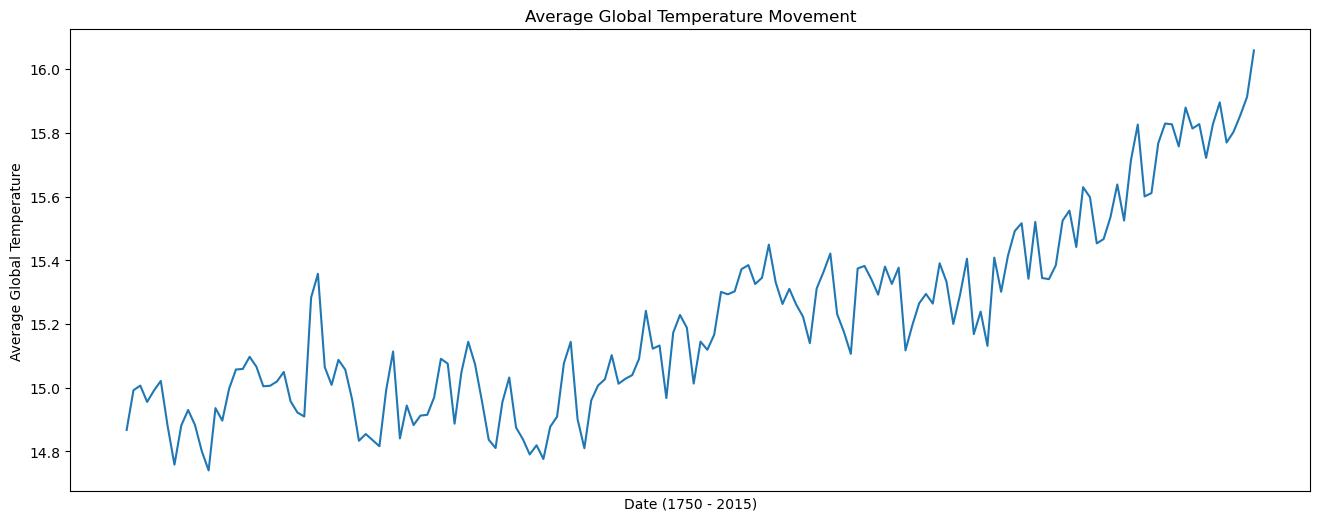

In [14]:
global_temp = global_temp[['dt', 'LandAndOceanAverageTemperature']]
global_temp.dropna(inplace=True)
global_temp['dt'] = pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt'] = global_temp['dt'].apply(lambda x:x[6:])
global_temp = global_temp.groupby(['dt'])['LandAndOceanAverageTemperature'].mean().reset_index()

plt.figure(figsize =(16, 6))
ax = sns.lineplot(
    x = global_temp['dt'],
    y = global_temp['LandAndOceanAverageTemperature'])
ax.set_title('Average Global Temperature Movement')
ax.set_ylabel('Average Global Temperature')
ax.set_xlabel('Date (1750 - 2015)')
ax.axes.get_xaxis().set_ticks([])
ax

### Now I'll use machine learning to predict the future average global temperature

In [16]:
global_temp

,dt,LandAndOceanAverageTemperature
0,1850,14.867167
1,1851,14.991833
2,1852,15.006500
3,1853,14.955167
4,1854,14.991000
...,...,...
161,2011,15.769500
162,2012,15.802333
163,2013,15.854417
164,2014,15.913000


In [17]:
# Preparing the data for machine learning
X = global_temp.iloc[:, global_temp.columns != 'LandAndOceanAverageTemperature'].values
y = global_temp.iloc[:, global_temp.columns == 'LandAndOceanAverageTemperature'].values

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
X_train

array([['1957'],
       ['1874'],
       ['2000'],
       ['2001'],
       ['1869'],
       ['1979'],
       ['1921'],
       ['1987'],
       ['1866'],
       ['1969'],
       ['1963'],
       ['1890'],
       ['1930'],
       ['1872'],
       ['2007'],
       ['1998'],
       ['1971'],
       ['1933'],
       ['1958'],
       ['1877'],
       ['1944'],
       ['1981'],
       ['1942'],
       ['1913'],
       ['1962'],
       ['1868'],
       ['1924'],
       ['1916'],
       ['1880'],
       ['1961'],
       ['1912'],
       ['1852'],
       ['1909'],
       ['1940'],
       ['1960'],
       ['1893'],
       ['1860'],
       ['1939'],
       ['2010'],
       ['1954'],
       ['1947'],
       ['1936'],
       ['1983'],
       ['2009'],
       ['1900'],
       ['1959'],
       ['1968'],
       ['1914'],
       ['1995'],
       ['2014'],
       ['1919'],
       ['1899'],
       ['1898'],
       ['1935'],
       ['1863'],
       ['1988'],
       ['1873'],
       ['1973'],
       ['1870'

In [21]:
# Fitting a linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [23]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

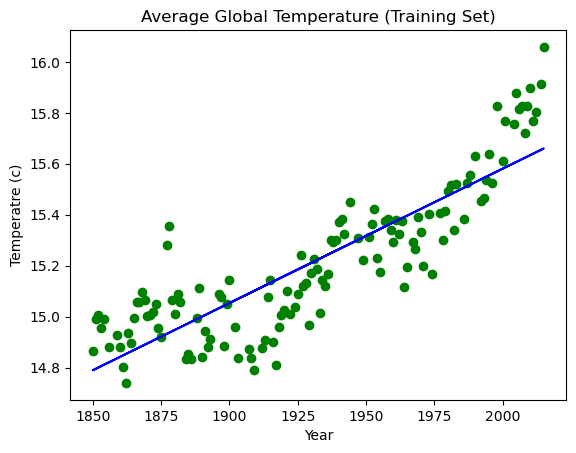

In [24]:
# Visualising the training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Global Temperature (Training Set)')
plt.xlabel('Year')
plt.ylabel('Temperatre (c)')
plt.show()

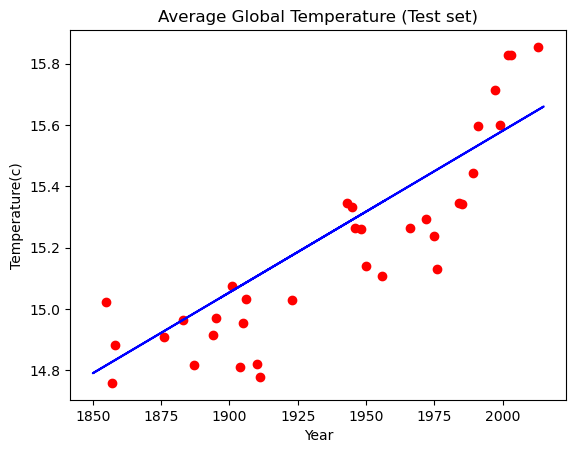

In [25]:
# Visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Global Temperature (Test set)')
plt.xlabel('Year')
plt.ylabel('Temperature(c)')
plt.show()

In [26]:
# Building the predictor
X_predict = [2050] # Enter the year that you require the temperature for
X_predict = np.array(X_predict).reshape(1, -1)#
y_predict = regressor.predict(X_predict)

# Outputting the predicted temperature of the year above
y_predict

array([[15.84463563]])

The average global temperature is likely to increase to 15.84 degrees celcius by 2050. That is an increase of circa 0.2 degrees between now and then and this is taking into account the combination average of sea and land temperatures.